<a href="https://colab.research.google.com/github/pradeepetech/testproject/blob/master/PHDEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import os

In [68]:
os.getcwd()

'/content'

In [3]:
# Loading Data in pandas Dataframe
df1 = pd.read_csv("/content/drive/My Drive/traindata.csv")
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# To display the top 5 rows
df1.head(5)

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [5]:
# Checking the data type
df1.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

In [6]:
# Total number of rows and columns
df1.shape

(101688779, 5)

In [7]:
print(df1.isnull().sum())

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64


In [0]:
# Type Conversations
df1['date'] = df1['date'].astype('datetime64')

In [0]:
#Catogarical Data
catdata = ['locationId','item_id','onpromotion']

In [0]:
numdata = ['unit_sales']

In [0]:
for num in numdata:
  df1[num] = df1[num].astype('int32')

In [0]:
for cat in catdata:
  df1[cat] = df1[cat].astype('category')

In [13]:
# Checking the data type
df1.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales              int32
onpromotion          category
dtype: object

In [0]:
df1["onpromotion"].fillna(0, inplace=True)

In [15]:
print(df1.isnull().sum())

date           0
locationId     0
item_id        0
unit_sales     0
onpromotion    0
dtype: int64


In [16]:
df1['onpromotion'].value_counts()

False    96627806
True      5060973
Name: onpromotion, dtype: int64

In [0]:
df1['onpromotion'] = df1['onpromotion'].replace(np.NaN, 'Unknown')

In [0]:
df2 = pd.read_csv("/content/drive/My Drive/item_details.csv")

In [19]:
df2.head()

,item_id,category_of_item,class,perishable
0,item_96995,grocery_items,class_1093,0
1,item_99197,grocery_items,class_1067,0
2,item_103501,cleaning_utilities,class_3008,0
3,item_103520,grocery_items,class_1028,0
4,item_103665,baked_items / bread_based,class_2712,1


In [0]:
catdata = ['item_id','category_of_item','class']

In [0]:
numdata = ['perishable']

In [0]:
for num in numdata:
  df2[num] = df2[num].astype('int8')

In [0]:
for cat in catdata:
  df2[cat] = df2[cat].astype('category')

In [0]:
df1_df2 = pd.merge(df1,df2, on='item_id', how='left')

In [25]:
df1_df2.head()

,date,locationId,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7,False,baked_items / bread_based,class_2712,1
1,2015-01-01,location_25,item_105574,1,False,grocery_items,class_1045,0
2,2015-01-01,location_25,item_105575,2,False,grocery_items,class_1045,0
3,2015-01-01,location_25,item_108079,1,False,grocery_items,class_1030,0
4,2015-01-01,location_25,item_108701,1,False,deli_items,class_2644,1


In [26]:
# Change the column names 
df1_df2 = df1_df2.rename({"locationId":"location_id"}, axis='columns') 
  
df1_df2.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7,False,baked_items / bread_based,class_2712,1
1,2015-01-01,location_25,item_105574,1,False,grocery_items,class_1045,0
2,2015-01-01,location_25,item_105575,2,False,grocery_items,class_1045,0
3,2015-01-01,location_25,item_108079,1,False,grocery_items,class_1030,0
4,2015-01-01,location_25,item_108701,1,False,deli_items,class_2644,1


In [0]:
df3 = pd.read_csv("/content/drive/My Drive/location_details.csv")

In [28]:
df3.head()

,location_id,city,state,type,cluster
0,location_1,Bengaluru,Karnataka,D,13
1,location_2,Bengaluru,Karnataka,D,13
2,location_3,Bengaluru,Karnataka,D,8
3,location_4,Bengaluru,Karnataka,D,9
4,location_5,Delhi,NCR,D,4


In [0]:
catdata = ['location_id','city','state','type']

In [0]:
numdata = ['cluster']

In [0]:
for num in numdata:
  df3[num] = df3[num].astype('int8')

In [0]:
for cat in catdata:
  df3[cat] = df3[cat].astype('category')

In [0]:
df4 = pd.read_csv("/content/drive/My Drive/train_transactions.csv")

In [34]:
df4.head()

,date,location_identifier,transactions
0,2015-01-01,location_25,770
1,2015-01-02,location_1,2111
2,2015-01-02,location_2,2358
3,2015-01-02,location_3,3487
4,2015-01-02,location_4,1922


In [0]:
catdata = ['location_identifier']

In [0]:
numdata = ['transactions']

In [0]:
for num in numdata:
  df4[num] = df4[num].astype('int8')

In [0]:
for cat in catdata:
  df4[cat] = df4[cat].astype('category')

In [39]:
# Change the column names 
df4 = df4.rename({"location_identifier":"location_id"}, axis='columns') 
  
df4.head()

,date,location_id,transactions
0,2015-01-01,location_25,2
1,2015-01-02,location_1,63
2,2015-01-02,location_2,54
3,2015-01-02,location_3,-97
4,2015-01-02,location_4,-126


In [0]:
df3_df4 = pd.merge(df3,df4, on='location_id', how='left')

In [41]:
df3_df4.head()

,location_id,city,state,type,cluster,date,transactions
0,location_1,Bengaluru,Karnataka,D,13,2015-01-02,63.0
1,location_1,Bengaluru,Karnataka,D,13,2015-01-03,41.0
2,location_1,Bengaluru,Karnataka,D,13,2015-01-04,71.0
3,location_1,Bengaluru,Karnataka,D,13,2015-01-05,-27.0
4,location_1,Bengaluru,Karnataka,D,13,2015-01-06,8.0


In [42]:
df1_df2.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7,False,baked_items / bread_based,class_2712,1
1,2015-01-01,location_25,item_105574,1,False,grocery_items,class_1045,0
2,2015-01-01,location_25,item_105575,2,False,grocery_items,class_1045,0
3,2015-01-01,location_25,item_108079,1,False,grocery_items,class_1030,0
4,2015-01-01,location_25,item_108701,1,False,deli_items,class_2644,1


In [0]:
df123 = pd.merge(df1_df2, df3, suffixes=('_merge','_location'),on='location_id',how='left')

In [44]:
df123.head()

,date,location_id,item_id,unit_sales,onpromotion,category_of_item,class,perishable,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7,False,baked_items / bread_based,class_2712,1,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2,False,grocery_items,class_1045,0,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1,False,grocery_items,class_1030,0,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1,False,deli_items,class_2644,1,Kanpur,Uttar Pradesh,D,1


Text(0.5, 1.0, 'unit_sales')

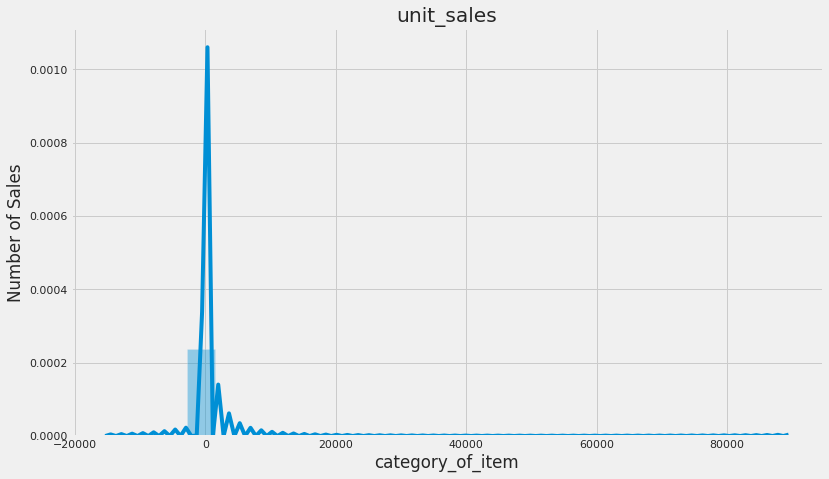

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df123.unit_sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("category_of_item")
plt.ylabel("Number of Sales")
plt.title("unit_sales")

In [53]:
numeric_features = df123.select_dtypes(include=[np.number])
numeric_features.dtypes

unit_sales    int32
perishable     int8
cluster        int8
dtype: object

In [54]:
corr =numeric_features.corr()
corr

,unit_sales,perishable,cluster
unit_sales,1.000000,0.052244,0.024421
perishable,0.052244,1.000000,0.002096
cluster,0.024421,0.002096,1.000000


In [55]:
print(corr['unit_sales'].sort_values(ascending=False))

unit_sales    1.000000
perishable    0.052244
cluster       0.024421
Name: unit_sales, dtype: float64


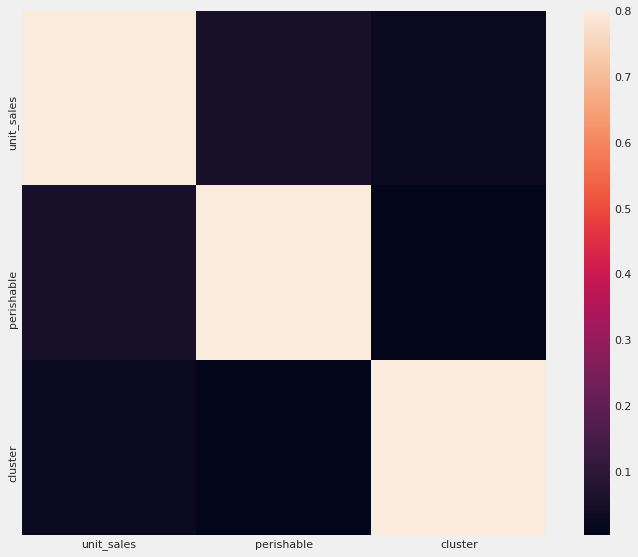

In [56]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

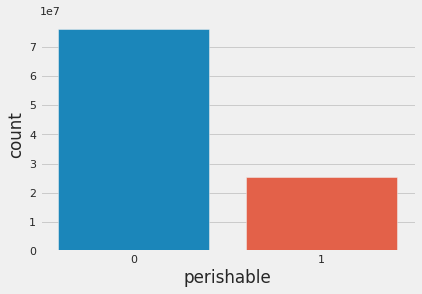

In [65]:
sns.countplot(df123.perishable)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

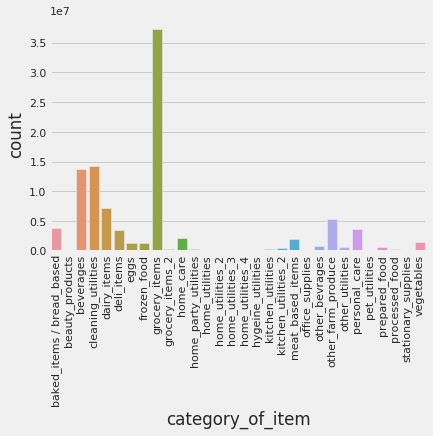

In [59]:
sns.countplot(df123.category_of_item)
plt.xticks(rotation=90)

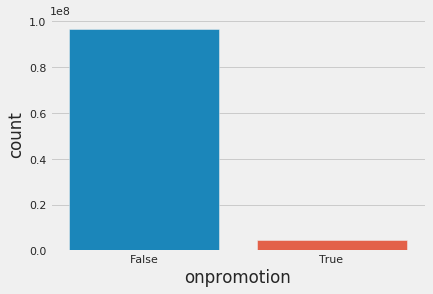

In [60]:
sns.countplot(df123.onpromotion)

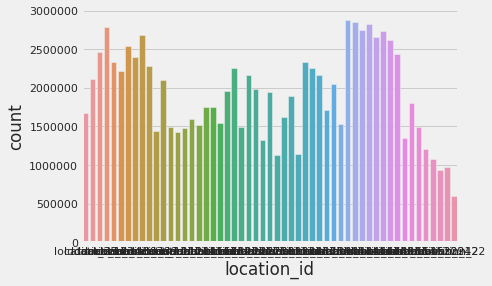

In [61]:
sns.countplot(df123.location_id)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

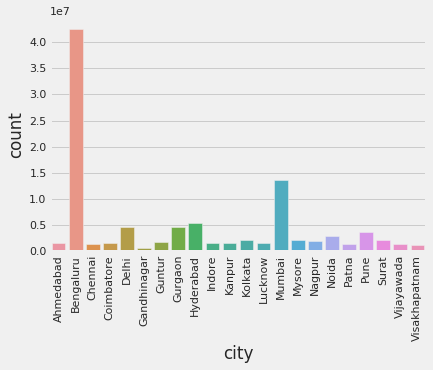

In [63]:
sns.countplot(df123.city)
plt.xticks(rotation=90)

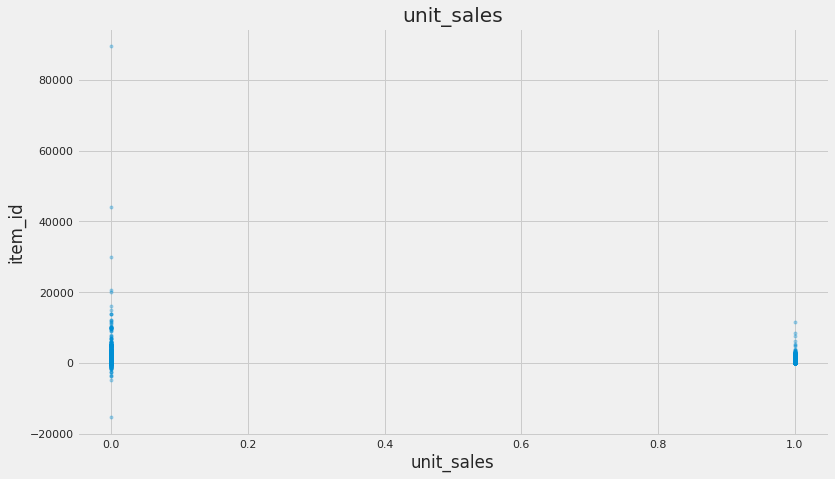

In [67]:
plt.figure(figsize=(12,7))
plt.xlabel("unit_sales")
plt.ylabel("item_id")
plt.title("unit_sales")
plt.plot(df123.onpromotion, df123["unit_sales"],'.', alpha = 0.3)

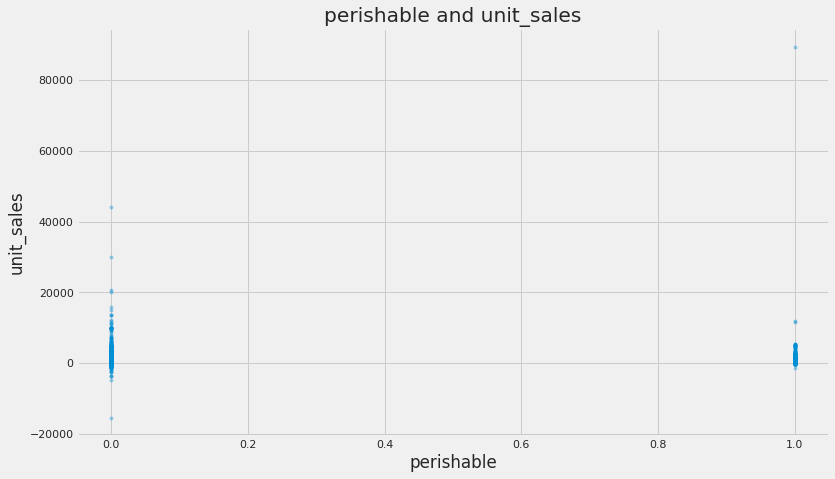

In [71]:
plt.figure(figsize=(12,7))
plt.xlabel("perishable")
plt.ylabel("unit_sales")
plt.title("perishable and unit_sales")
plt.plot(df123.perishable, df123["unit_sales"],'.', alpha = 0.3)